In [53]:
#import libraries
import pandas as pd
import numpy as np
import cv2, boto3  
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.metrics import f1_score

from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.utils import np_utils
from keras.optimizers import SGD

from IPython.core.display import display, HTML
from PIL import Image
from io import BytesIO
import base64

from pathlib import Path
from zipfile import ZipFile

In [34]:
FILE_NAME = "archive.zip"
BUCKET_NAME = "celeba-facial-recog"
OBJECT_NAME = "archive.zip"

s3 = boto3.client('s3')
if not Path(FILE_NAME).exists():
    s3.download_file(BUCKET_NAME, OBJECT_NAME, FILE_NAME)

In [ ]:
# for file in Path("./facial-recognition-celebA/img_align_celeba/img_align_celeba"):
#     if file.endswith(".jpg"):
#         print(file)
# try:
#     response = s3.upload_file("/img_align_celeb/img_align_celeb/000001.jpg", BUCKET_NAME, "training_images/000001.jpg")
# except ClientError as e:
#     logging.error(e)



## 1. Data Exploration

In [36]:
TRAINING_SAMPLES = 10000
VALIDATION_SAMPLES = 2000
TEST_SAMPLES = 2000
IMG_WIDTH = 178
IMG_HEIGHT = 218
BATCH_SIZE = 16
NUM_EPOCHS = 20

In [37]:
df_attr = pd.read_csv('list_attr_celeba.csv')
df_attr.set_index('image_id', inplace=True)
df_attr.replace(to_replace=-1, value=0, inplace=True) #replace -1 by 0
df_attr.shape

(202599, 40)

Smiling    1
Male       0
Young      0
Name: 007324.jpg, dtype: int64

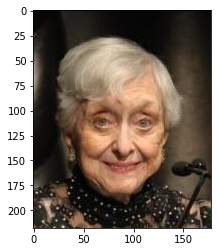

In [55]:
images_folder = 'img_align_celeba/img_align_celeba/'
EXAMPLE_PIC = images_folder + '007324.jpg'
img = load_img(EXAMPLE_PIC)
plt.grid(False)
plt.imshow(img)
df_attr.loc[EXAMPLE_PIC.split('/')[-1]][['Smiling','Male','Young']] #some attributes


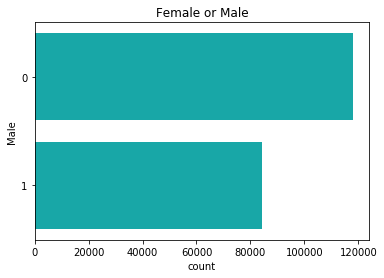

In [52]:
plt.title('Female or Male')
sns.countplot(y='Male', data=df_attr, color="c")
plt.show()